<a href="https://colab.research.google.com/github/sagarpuniyani/Deep-learning/blob/master/corealtion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np 
import os 
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
def plotCorrelationMatrix(df, graphWidth):
    filename = df.dataframeName
    df = df.dropna('columns') # drop columns with NaN
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    if df.shape[1] < 2:
        print(f'No correlation plots shown: The number of non-NaN or constant columns ({df.shape[1]}) is less than 2')
        return
    corr = df.corr()
    plt.figure(num=None, figsize=(graphWidth, graphWidth), dpi=80, facecolor='w', edgecolor='k')
    corrMat = plt.matshow(corr, fignum = 1)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.gca().xaxis.tick_bottom()
    plt.colorbar(corrMat)
    plt.title(f'Correlation Matrix for {filename}', fontsize=15)
    plt.show()

In [ ]:
def plotScatterMatrix(df, plotSize, textSize):
    df = df.select_dtypes(include =[np.number])
    df = df.dropna('columns')
    df = df[[col for col in df if df[col].nunique() > 1]]
    columnNames = list(df)
    if len(columnNames) > 10:
        columnNames = columnNames[:10]
    df = df[columnNames]
    ax = pd.plotting.scatter_matrix(df, alpha=0.75, figsize=[plotSize, plotSize], diagonal='kde')
    corrs = df.corr().values
    for i, j in zip(*plt.np.triu_indices_from(ax, k = 1)):
        ax[i, j].annotate('Corr. coef = %.3f' % corrs[i, j], (0.8, 0.2), xycoords='axes fraction', ha='center', va='center', size=textSize)
    plt.suptitle('Scatter and Density Plot')
    plt.show()


In [ ]:
for dirname, _, filenames in os.walk('/content/drive/MyDrive/research work '):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/content/drive/MyDrive/research work /01_Steps.csv
/content/drive/MyDrive/research work /02_Sleep.csv
/content/drive/MyDrive/research work /linearreg3.ipynb
/content/drive/MyDrive/research work /Untitled project.gscript
/content/drive/MyDrive/research work /corealtion.ipynb


In [ ]:
nRowsRead = None
df2 = pd.read_csv(r'/content/drive/MyDrive/research work /02_Sleep.csv', delimiter=',', nrows = nRowsRead)
df2.dataframeName = 'Sleep.csv'
nRow, nCol = df2.shape
print(f'There are {nRow} rows and {nCol} columns')
print(df2.head(5))

There are 2454 rows and 6 columns
         date  deepSleepTime  shallowSleepTime  wakeTime       start  \
0  2016-04-27              0                 0         0  1461708000   
1  2016-04-28            158               262         2  1461801240   
2  2016-04-29            234               241         0  1461883500   
3  2016-04-30            239               318         0  1461979500   
4  2016-05-01            180               333         3  1462065840   

         stop  
0  1461708000  
1  1461826560  
2  1461912000  
3  1462012920  
4  1462096800  


<ipython-input-3-f2ab153ff77f>:3: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only.
  df = df.dropna('columns') # drop columns with NaN
<ipython-input-3-f2ab153ff77f>:8: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


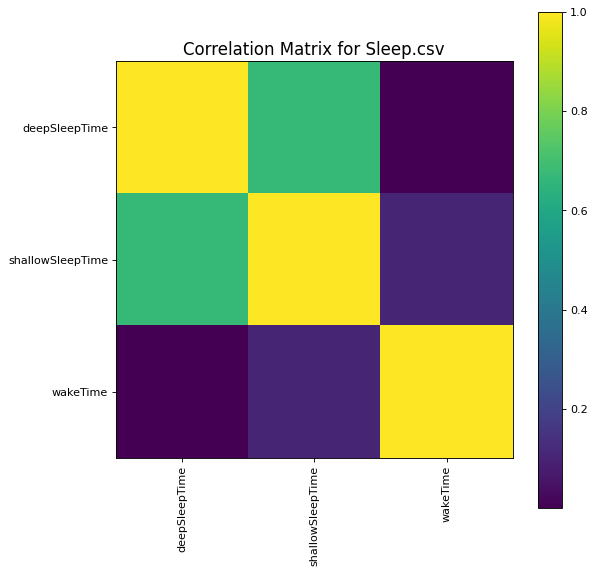

In [ ]:
plotCorrelationMatrix(df2, 8)

<ipython-input-4-0cdd5ce0d811>:3: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only.
  df = df.dropna('columns')


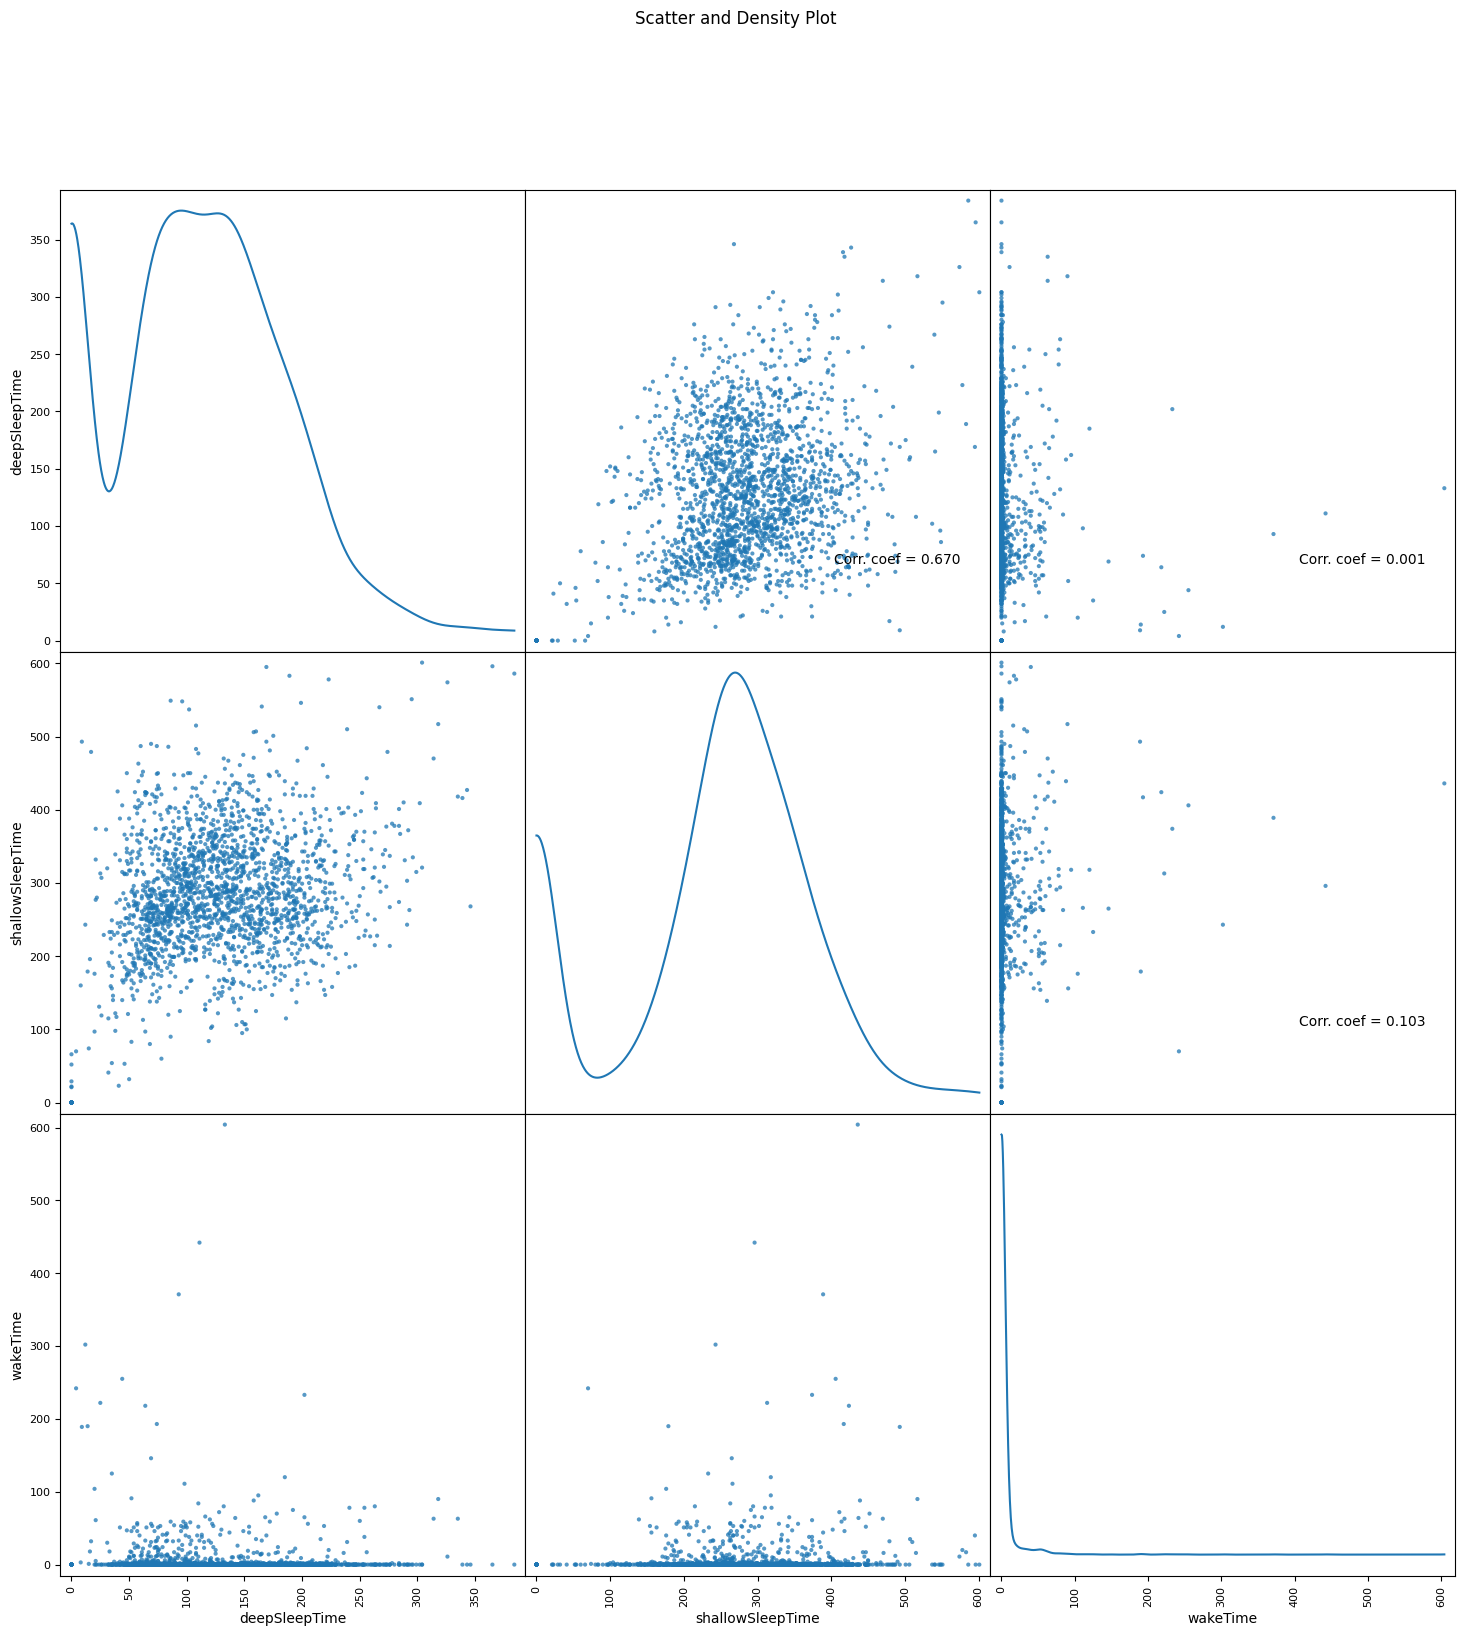

In [ ]:
plotScatterMatrix(df2, 18, 10)

In [ ]:
df1 = pd.read_csv('/content/drive/MyDrive/research work /01_Steps.csv', delimiter=',', nrows = nRowsRead)
df1.dataframeName = 'Steps.csv'

In [ ]:
nRow, nCol = df1.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 2454 rows and 5 columns


<ipython-input-3-f2ab153ff77f>:3: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only.
  df = df.dropna('columns') # drop columns with NaN
<ipython-input-3-f2ab153ff77f>:8: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


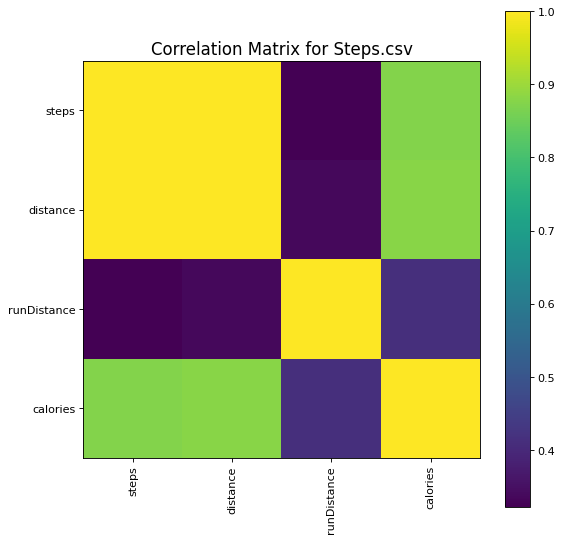

In [ ]:
plotCorrelationMatrix(df1, 8)

<ipython-input-4-0cdd5ce0d811>:3: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only.
  df = df.dropna('columns')


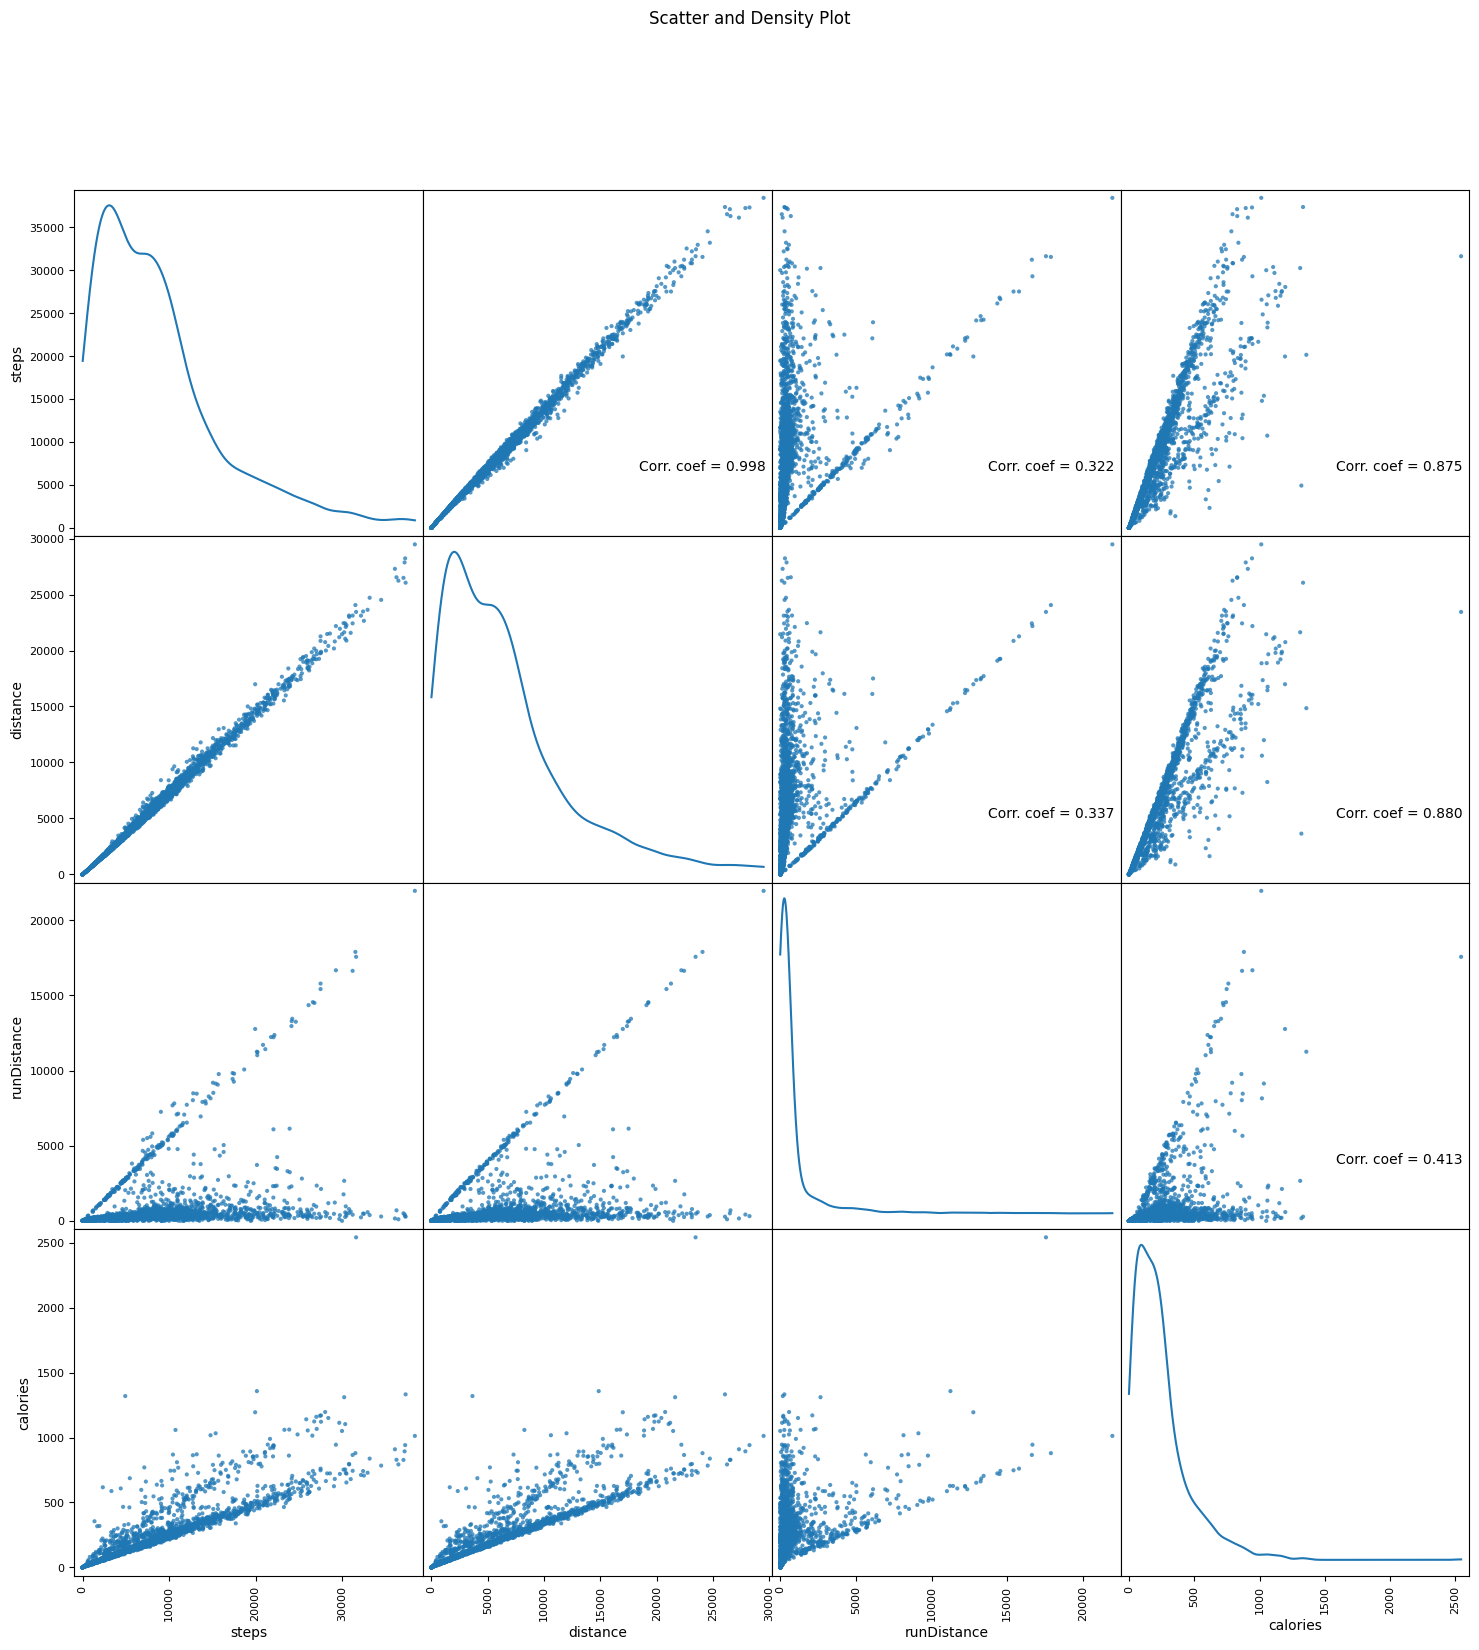

In [ ]:
plotScatterMatrix(df1, 18, 10)